In [36]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
a = [-24643.3203,    -66.0129,   2088.8701,   1616.9122,   2208.6841,
          2009.4779,   1608.5013,   2226.3691,   1744.8176,   1946.3237,
          1713.1873,  -5678.1514, -24643.3203,    -66.0129,   2088.8701,
          1616.9122,   2208.6841,   2009.4778,   1608.5016,   2226.3691,
          1744.8174,   1946.3234,   1713.1874,  -5678.1514,   2462.7253]
ws = [0]*len(a)
ub = [0]*len(a)
for i in range(1, len(a)):
    ws[i] = max(0, round(a[i - 1]))
    ub[i] = max(0, round(max(0, a[i - 1]) + a[-1]))
print(ws)
print(ub)

[0, 0, 0, 2089, 1617, 2209, 2009, 1609, 2226, 1745, 1946, 1713, 0, 0, 0, 2089, 1617, 2209, 2009, 1609, 2226, 1745, 1946, 1713, 0]
[0, 2463, 2463, 4552, 4080, 4671, 4472, 4071, 4689, 4208, 4409, 4176, 2463, 2463, 2463, 4552, 4080, 4671, 4472, 4071, 4689, 4208, 4409, 4176, 2463]


In [88]:
def create_arrays(periods, times):
    print("time:", math.ceil(np.mean(np.array(times)[:, -1])))
    max_time = math.ceil(np.max(np.array(times)[:, -1])) + 2
    print(max_time)
    i = 0
    ps = []
    ts = [*range(max_time + 1)]
    for i in range(len(periods)):
        period = periods[i]
        time = times[i]
        j = 0
        ps.append([period[j]])
        for ti in range(max_time):
            if j == len(period):
                ps[-1].append(period[j-1])
            elif time[j] <= ti:
                ps[-1].append(period[j])
                j += 1
            else:
                ps[-1].append(ps[-1][-1])
    print(np.array([[1, 2], [1, 2]]))
    print(np.shape(np.array(ps)))
    print(np.array(ps))
    ps = np.mean(ps, axis = 0).tolist()
    print(ts[-1])
    return ps, ts


In [89]:
results = {}
with open("results.txt", "r") as f:
    res = f.read().split("\n__________\n")
    for i in range(len(res)):
        split = res[i].split("\n==========\n")
        key = split[0]
        split = split[1].split("\n----------\n")
        period = []
        time = []
        print(key)
        for j in split:
            period.append(float(j.split("\n")[4].replace("period ", "")))
            time.append(float(j.split("\n")[7].replace("% time elapsed: ", "").replace("s", "")))
        if not key in results:
            results[key] = {}
            results[key]["periods"] = []
            results[key]["times"] = []
        results[key]["periods"].append(period)
        results[key]["times"].append(time)
        
for title, res in results.items():
    period, time = create_arrays(res["periods"], res["times"])
    res["period"] = period
    res["time"] = time
    print("p", len(period))
    print(len(time))
print(results["warm start"])

no warm start
no warm start
no warm start
warm start
warm start
warm start
upper bound warm start
upper bound warm start
upper bound warm start
time: 527
529
[[1 2]
 [1 2]]
(3, 530)
[[30652. 30652. 30652. ...  4885.  4873.  4873.]
 [30652. 30652. 30652. ...  4873.  4873.  4873.]
 [30652. 30652. 30652. ...  4885.  4873.  4873.]]
529
p 530
530
time: 482
485
[[1 2]
 [1 2]]
(3, 486)
[[30652. 30652. 30652. ...  4873.  4873.  4873.]
 [30652. 30652. 30652. ...  4885.  4873.  4873.]
 [30652. 30652. 30652. ...  4873.  4873.  4873.]]
485
p 486
486
time: 503
517
[[1 2]
 [1 2]]
(3, 518)
[[30652. 30652. 30652. ...  4873.  4873.  4873.]
 [30652. 30652. 30652. ...  4885.  4873.  4873.]
 [30652. 30652. 30652. ...  4873.  4873.  4873.]]
517
p 518
518
{'periods': [[30652.0, 30631.0, 26607.0, 26444.0, 26384.0, 8626.0, 7361.0, 7267.0, 7106.0, 6709.0, 6529.0, 5877.0, 5329.0, 5294.0, 5289.0, 5280.0, 5268.0, 5249.0, 5242.0, 5131.0, 5053.0, 4885.0, 4873.0], [30652.0, 30631.0, 26607.0, 26444.0, 26384.0, 8626.0

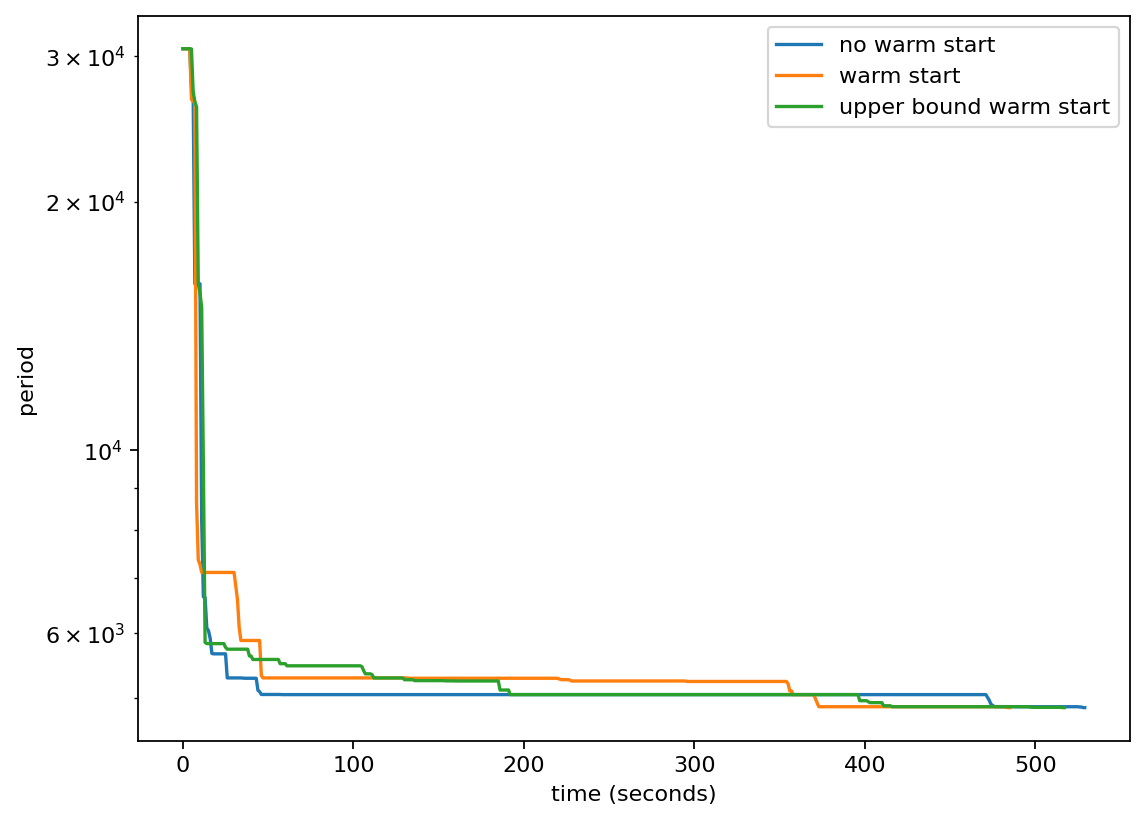

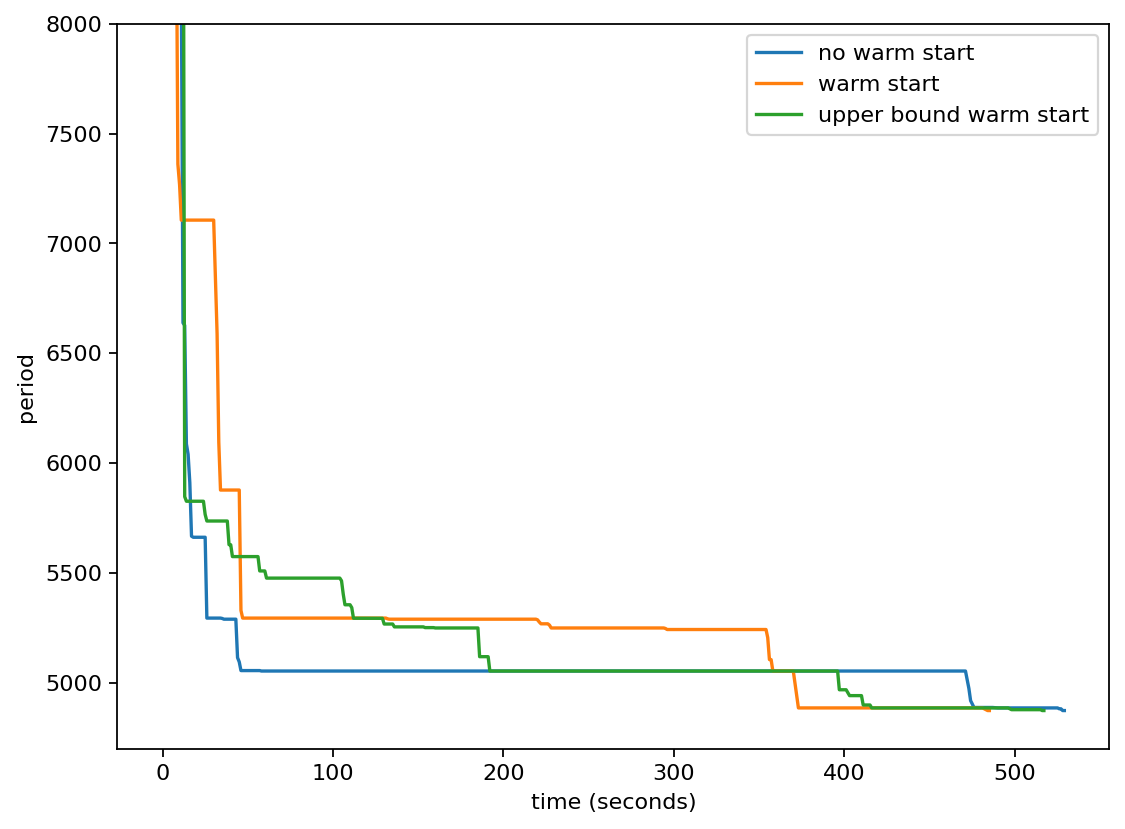

In [90]:
def plot():
    plt.figure(figsize=(8, 6), dpi=160)    
    for title, res in results.items():
        plt.plot(res["time"], res["period"], label=title) 
    plt.xlabel("time (seconds)")
    plt.ylabel("period")
    plt.legend()

plot()
plt.yscale('log')
plt.show()

plot()
plt.ylim([4700, 8000])
plt.show()